*Name: Vaidehi Anant Vatsaraj* <br>
*UID: 2018130060*

Objective: Understanding Support Vector Machine algorithm through building SVM algorithm in Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
  x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
  y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max))
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
  plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
  sv = svc.support_vectors_
  plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()
  print('Number of support vectors: ', svc.support_.size)

Generate a set of observations, which belong to two classes:

In [ ]:
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] + 1

Plot the data to see whether the classes are linearly separable

Text(0, 0.5, 'X2')

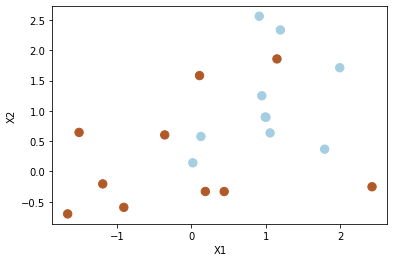

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Not linearly seperable

Fit the support vector classifier

In [ ]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

Plot the support vector classifier by calling the plot_svc() function on the output of the call to SVC(), as well as the data used in the call to SVC():

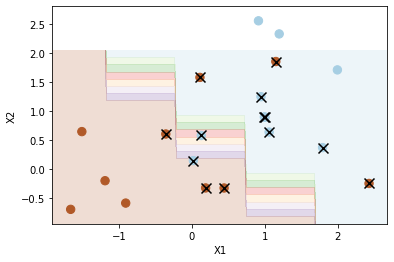

Number of support vectors:  13


In [ ]:
plot_svc(svc,X,y)

In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

Use a smaller value of the cost parameter

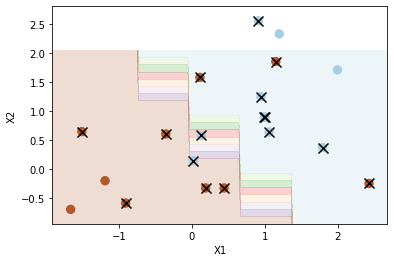

Number of support vectors:  16


In [ ]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

Perform 10-fold cross-validation to compare SVMs with a linear kernel, using a range of values of the cost param- eter:

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00103161, 0.00055506, 0.00055916, 0.00059211, 0.00058422,
        0.00058408, 0.0007381 ]),
 'mean_score_time': array([0.00045023, 0.00031309, 0.00031662, 0.0003696 , 0.00031714,
        0.00031848, 0.0003149 ]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

In [ ]:
clf.best_params_

{'C': 0.001}

In [ ]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

In [ ]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 2,  6],
       [ 0, 12]])

Text(0, 0.5, 'X2')

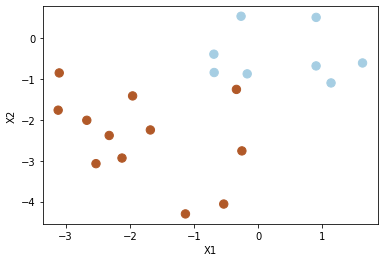

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Fit the support vector classifier and plot the resulting hyperplane, using a very large value of cost so that no observations are misclassified.

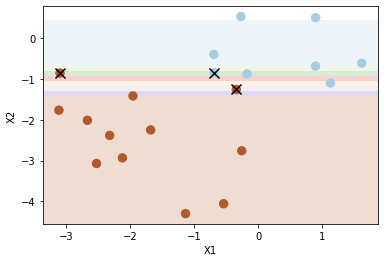

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

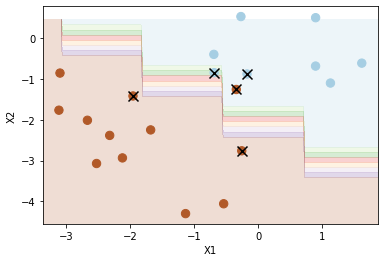

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

Support Vectore Machine: Kernel Method

Text(0, 0.5, 'X2')

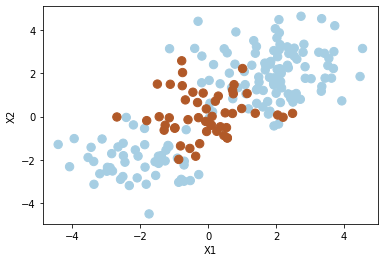

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5,random_state=0)
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

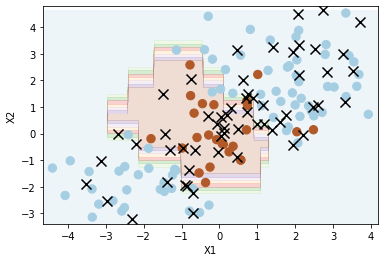

Number of support vectors:  60


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

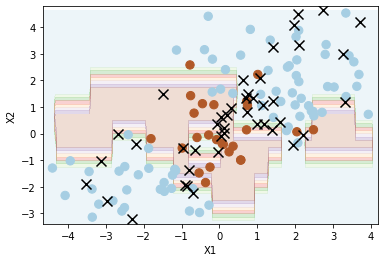

Number of support vectors:  46


In [ ]:
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1, 'gamma': 0.5}

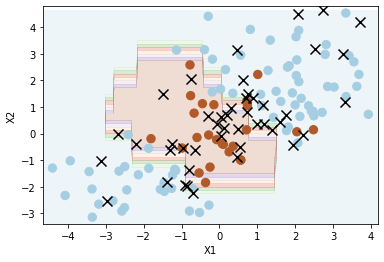

Number of support vectors:  48
[[71  4]
 [ 6 19]]
0.9


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

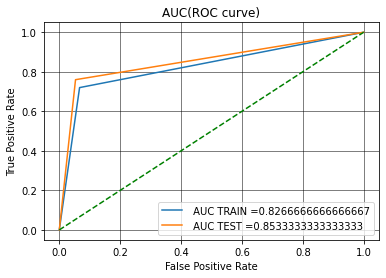

In [ ]:
from sklearn.metrics import roc_curve,auc
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, clf.best_estimator_.predict(X_train))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, clf.best_estimator_.predict(X_test))
plt.grid()
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1bbfXXXzSZNazqCUj2L1Q-Nz8Lnf1A3iwFZL3aJKEhJk/export?format=csv&gid=75006690')
data.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
data.groupby(['Class']).mean()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
Class,,,,,,,,
0,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344
1,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728


In [ ]:
pd.DataFrame(data.corr()['Class']).sort_values(by='Class').transpose().drop('Class',axis=1).transpose()
X = data.drop('Class',axis=1)
Y = data['Class']
X['nf']=X['EK']*X['Skewness']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
from sklearn.svm import SVC

In [ ]:
kernels = ("linear", "poly", "rbf")
for kernel in kernels:
  svc = SVC(kernel=kernel)
  svc.fit(X_train,Y_train)
  print("Kernel: ",kernel)
  print(accuracy_score(Y_test,svc.predict(X_test)))
  print(classification_report(Y_test,svc.predict(X_test)))

Kernel:  linear
0.979050279329609
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.82      0.87       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Kernel:  poly
0.9782122905027933
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.96      0.79      0.87       321

    accuracy                           0.98      3580
   macro avg       0.97      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Kernel:  rbf
0.9793296089385475
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.82      0.88       321

    accuracy                           0.98      3580
   macro avg       0.96      

#### **Conclusion**<br>
In this experiment, I implemented the Support Vector Machine. Firstly, I checked if the data was linearly seperable by plotting it. Since the data was not linearly seperable, an SVM was a good option for the classification. I tested it eith different values of the parameter 'C' and varois 'kernels.' After tuning the parameters, I was able to achieve an accuracy of 95.93%.